In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Load the data file
data= pd.read_csv("train.csv")

In [4]:
data.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


## Data preprocessing

In [5]:
## check data types and null count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


Analysis - 
1) we don't have any null value in dataset 
2) we have 5 object type elements - 'ID' is unique so we are not going to use it for analysis but other categorical values like 
Gender,Product_Holdings, Credit_Category, Income effects the churn rate - which we are going to analyze.
- we can encode it to numerical values for model building
3) the Is_Churn column is int64 making my target binary feature

In [6]:
# Check the descriptive statistics of numeric variables
data.describe()

,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn
count,6650.000000,6.650000e+03,6650.000000,6650.000000,6650.000000,6650.000000
mean,41.130226,8.045954e+05,2.250226,0.515789,0.664361,0.231128
std,9.685747,5.157549e+05,1.458795,0.499788,0.472249,0.421586
min,21.000000,6.300000e+01,0.000000,0.000000,0.000000,0.000000
25%,34.000000,3.922642e+05,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.649386e+05,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.147124e+06,3.000000,1.000000,1.000000,0.000000
max,72.000000,2.436616e+06,5.000000,1.000000,1.000000,1.000000


it's not giving much useful analysis - but we can conclude from 'Vintage' feature that we have data of customers with 0-5 years a of membership. 
we can also say that - 'Transaction_status', 'Credit_Card' being numeric values are not making any sence 

## correlation heatmap

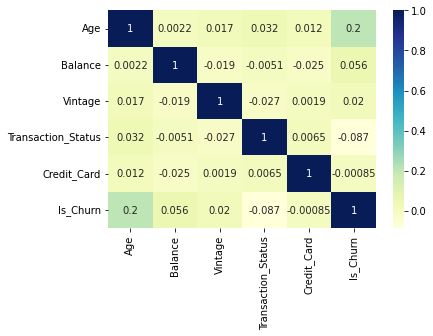

In [7]:

#pearsons correlation
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

##  Data Analysis and visualization

In [8]:
#Analysing important features 

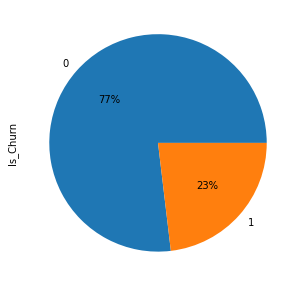

In [9]:
#the target variable
fig = plt.subplots(figsize=(5,5))
data['Is_Churn'].value_counts().plot(kind='pie',autopct = '%.0f%%')
plt.show()

It shows that distribution that almost 23% of our total training data members are churned (1) due to some factors lets see the analysis to find the reason

<AxesSubplot:>

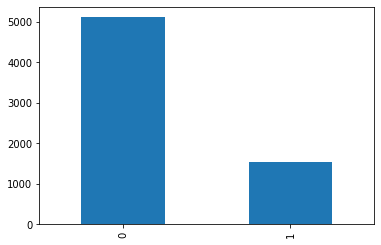

In [10]:
data['Is_Churn'].value_counts().plot(kind ='bar')

Data is imbalanced - need to use some technique to balance the dataset

<AxesSubplot:>

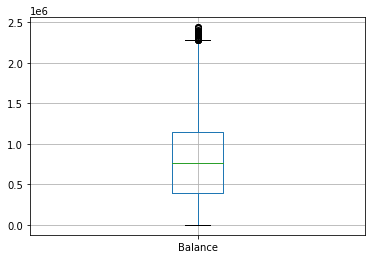

In [11]:
data.boxplot('Balance')

<AxesSubplot:ylabel='Density'>

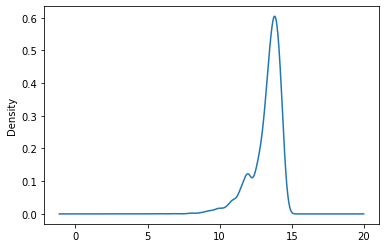

In [12]:
data['Balance'].apply(lambda x:np.log1p(x)).plot(kind='kde')


<AxesSubplot:>

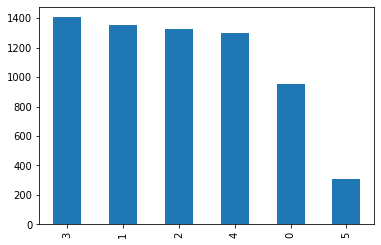

In [13]:
data['Vintage'].value_counts().plot(kind='bar')

In [14]:
# Separating Numerical and Categorical Columns

numerical_features =data.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_features=data.select_dtypes(include=['object','category']).columns.tolist()

In [15]:
categorical_features.remove('ID')

In [16]:
print(numerical_features)
print(categorical_features)

['Age', 'Balance', 'Vintage', 'Transaction_Status', 'Credit_Card', 'Is_Churn']
['Gender', 'Income', 'Product_Holdings', 'Credit_Category']


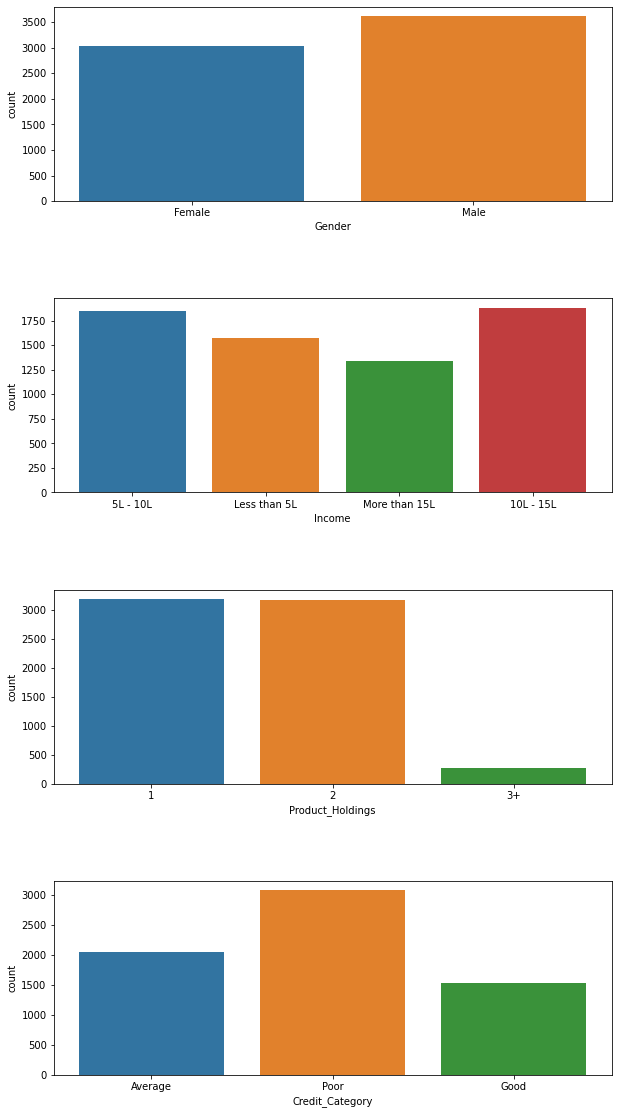

In [17]:
# Plotting Countplot for Categorical Features
fig = plt.figure(figsize=(10,25))
for index,var in enumerate(categorical_features): #Enumarte returns values as well as the index of the value
    if var!="ID":
        plt.subplot(5,1,index+1) 
        plt.subplots_adjust(hspace=0.5)
        plt.xticks(rotation=0)
        sns.countplot(x = var, data=data)
        plt.plot()


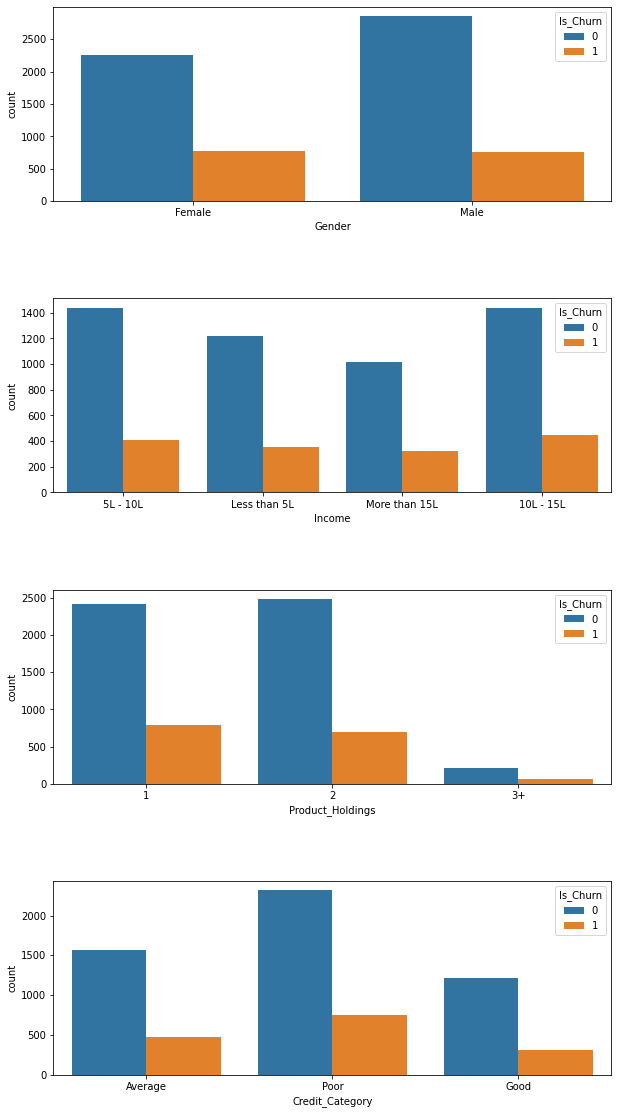

In [18]:
# BarPlot for Categorical Column with respect to Churn Columns
plt.figure(figsize=(10,25))
for index,cat_feat in enumerate(categorical_features):
    if ((cat_feat !="ID") & (cat_feat != "Is_Churn")):
        plt.subplot(5,1,index+1)
        plt.subplots_adjust(hspace=0.5)
        plt.xticks(rotation=0)
        sns.countplot(x = cat_feat,hue = "Is_Churn", data=data)


the churn rate is in similar proportion with all the categorical features